In [ ]:
#importing library

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#cek version tensorflow

In [2]:
tf.__version__

'2.15.0'

In [ ]:
#train image processing

In [6]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
training_set = train_datagen.flow_from_directory(
        'training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 3409 images belonging to 5 classes.


In [ ]:
#test image processing

In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        'test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 1944 images belonging to 5 classes.


In [ ]:
#Building Model

In [7]:
cnn = tf.keras.models.Sequential()

In [ ]:
#Building Convolution Layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64 , kernel_size=3 , activation='relu' , input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=64 , kernel_size=3 , activation='relu' ))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2 , strides=2))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dense(units=5 , activation='softmax'))

In [14]:
cnn.compile(optimizer = 'rmsprop' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [15]:
cnn.fit(x = training_set , validation_data = test_set , epochs = 30)

Epoch 1/30
107/107 [==============================] - 12s 106ms/step - loss: 1.3667 - accuracy: 0.4327 - val_loss: 1.0478 - val_accuracy: 0.5772
Epoch 2/30
107/107 [==============================] - 11s 104ms/step - loss: 1.1087 - accuracy: 0.5474 - val_loss: 1.0053 - val_accuracy: 0.6188
Epoch 3/30
107/107 [==============================] - 11s 103ms/step - loss: 1.0089 - accuracy: 0.6043 - val_loss: 0.9630 - val_accuracy: 0.6276
Epoch 4/30
107/107 [==============================] - 11s 107ms/step - loss: 0.9356 - accuracy: 0.6357 - val_loss: 0.8848 - val_accuracy: 0.6590
Epoch 5/30
107/107 [==============================] - 12s 108ms/step - loss: 0.8808 - accuracy: 0.6671 - val_loss: 0.6799 - val_accuracy: 0.7572
Epoch 6/30
107/107 [==============================] - 12s 108ms/step - loss: 0.8319 - accuracy: 0.6785 - val_loss: 0.6845 - val_accuracy: 0.7546
Epoch 7/30
107/107 [==============================] - 12s 112ms/step - loss: 0.7975 - accuracy: 0.6882 - val_loss: 0.8711 - val_ac

In [ ]:
#Preprocessing New Image

1/1 [==============================] - 0s 15ms/step
[[0. 0. 0. 1. 0.]]


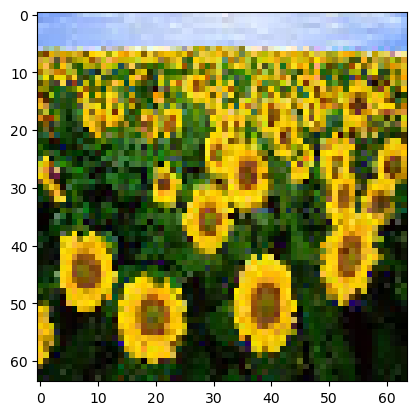

In [38]:
from keras.preprocessing import image

ori_image = image.load_img('Prediction/Unknown.jpeg',target_size=(64,64))
test_image = image.img_to_array(ori_image)
test_image = np.expand_dims(test_image,axis=0)
result = cnn.predict(test_image)
training_set.class_indices
print(result)
plt.imshow(ori_image)

In [ ]:
#cek

In [33]:
if result[0][0]==1:
    print('Daisy')
elif result[0][1]==1:
    print('Dandelion')
elif result[0][2]==1:
    print('Rose')
elif result[0][3]==1:
    print('SunFlower')
elif result[0][4]==1:
    print("Tulip")

SunFlower


In [21]:
print(result)

[[0. 0. 0. 1. 0.]]
